In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame = True)

In [3]:
X , y  = mnist.data, mnist.target

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
y.value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

In [7]:
feature_names = mnist.feature_names
feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [8]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [9]:
def plot_image(image_data):
    image_data = np.array(image_data)
    image = image_data.reshape(28,28)
    plt.figure(figsize = (5,5))
    plt.imshow(image,cmap = 'binary')
    plt.axis('off')
    plt.show()

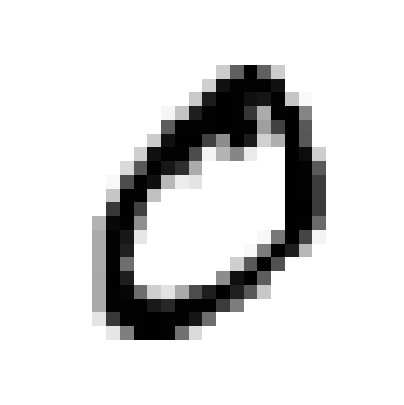

In [10]:
some_digit = X.iloc[1,:]
plot_image(some_digit)

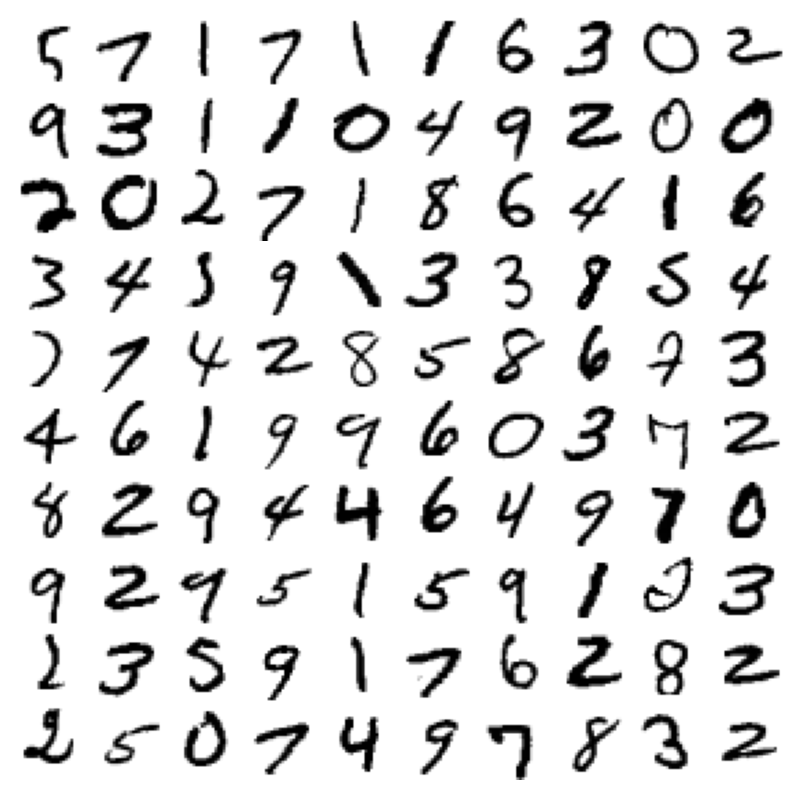

In [11]:
plt.figure(figsize=(10, 10))
for idx in range(100,200):
    plt.subplot(10, 10, idx - 99)
    image_data = X.iloc[idx,:]
    image_data = np.array(image_data)
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap = 'binary')
    plt.axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


In [12]:
X_train,X_test ,y_train,y_test= X.iloc[:60000,:],X.iloc[60000:,:],y.iloc[:60000],y.iloc[60000:]

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
from sklearn.model_selection import cross_val_score
kn_clf_cvs = cross_val_score(kn_clf,X_train,y_train,cv = 10,scoring = 'accuracy')
kn_clf_cvs

array([0.97383333, 0.967     , 0.96816667, 0.97366667, 0.9705    ,
       0.97066667, 0.9695    , 0.969     , 0.96216667, 0.976     ])

In [15]:
kn_clf_cvs.mean()

0.9700499999999999

In [16]:
y_predicted = kn_clf.predict(X_test)
y_predicted

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.9688

In [18]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predicted,average = 'weighted')

0.9690205934964162

In [19]:
from sklearn.metrics import recall_score
recall_score(y_test,y_predicted,average = 'weighted')

0.9688

In [20]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predicted,average = 'weighted')

0.9687470572168784

In [21]:
y_scores = kn_clf.predict_proba(X_test)
y_scores

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]],
      dtype=int64)

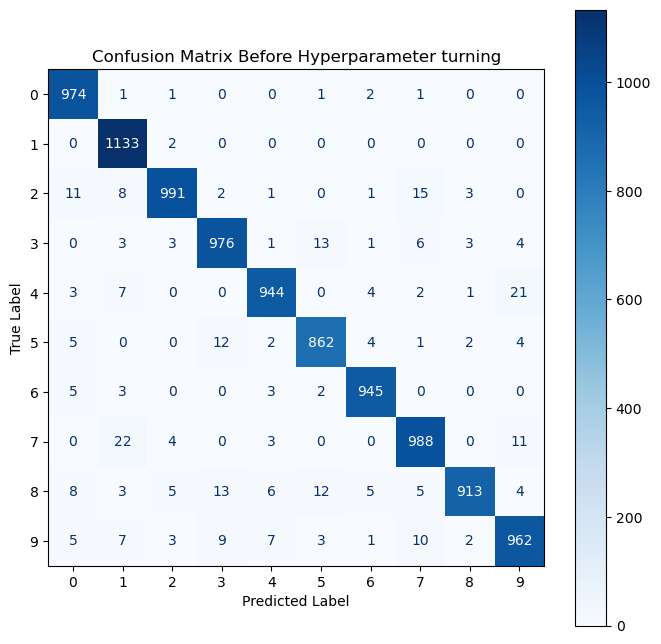

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(
    cmap='Blues',      
    ax=ax,             
    colorbar=True,     
    values_format='d'  
)
ax.set_title('Confusion Matrix Before Hyperparameter turning')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.show()

In [24]:
kn_best_clf = KNeighborsClassifier(weights='distance',n_neighbors= 4,n_jobs= -1)

In [25]:
kn_best_clf.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [44]:
kn_best_cvs = cross_val_score(kn_best_clf,X_train,y_train,cv = 10,scoring = 'accuracy')
kn_best_cvs_mean = kn_best_cvs.mean()

In [45]:
kn_best_cvs_mean

0.9728666666666668

In [46]:
y_scores = kn_best_clf.predict_proba(X_test)
y_scores

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
y_pred = kn_best_clf.predict(X_test)
y_pred

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [48]:
accuracy_score(y_test,y_pred)

0.9714

In [49]:
precision_score(y_test,y_pred,average = 'weighted')

0.9715166824529755

In [50]:
recall_score(y_test,y_pred,average = 'weighted')

0.9714

In [51]:
f1_score(y_test,y_pred,average = 'weighted')

0.9713597782738583

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_scores, multi_class='ovr')

0.9943651146279352

In [53]:
from sklearn.metrics import log_loss
log_loss(y_test,y_scores)

0.404610338346719

In [54]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.9682083320892713

In [55]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.9682303121524354

In [56]:
from sklearn.metrics import top_k_accuracy_score
top_k_accuracy_score(y_test,y_scores, k=3)

0.9915

In [57]:
cm_tuned = confusion_matrix(y_test,y_pred)
cm_tuned

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  10,    5,  995,    2,    1,    0,    0,   16,    3,    0],
       [   0,    1,    3,  974,    1,   14,    1,    7,    4,    5],
       [   1,    5,    0,    0,  950,    0,    4,    3,    0,   19],
       [   4,    0,    0,    9,    2,  862,    7,    1,    3,    4],
       [   4,    2,    0,    0,    3,    3,  946,    0,    0,    0],
       [   0,   17,    4,    0,    3,    0,    0,  994,    0,   10],
       [   5,    2,    4,   14,    5,   11,    4,    4,  920,    5],
       [   3,    4,    2,    7,    9,    4,    1,   10,    1,  968]],
      dtype=int64)

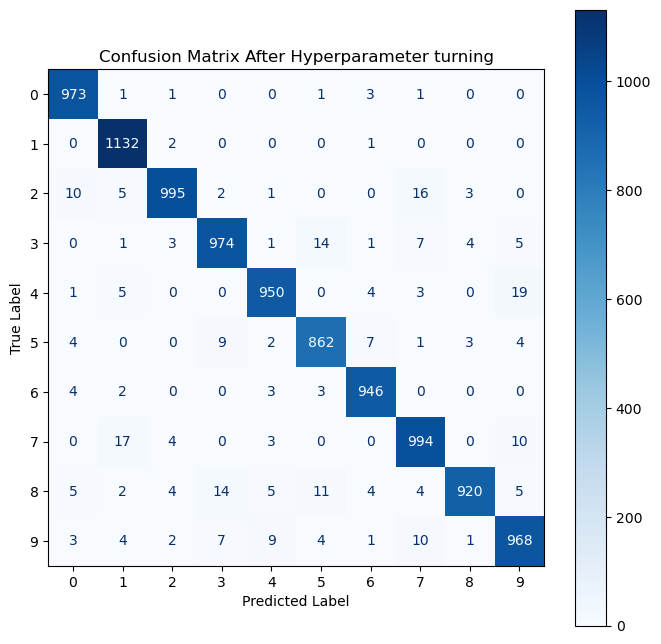

In [58]:
cm_display_tuned = ConfusionMatrixDisplay(cm_tuned)
fig, ax = plt.subplots(figsize=(8,8))
cm_display_tuned.plot(
    cmap='Blues',      
    ax=ax,             
    colorbar=True,     
    values_format='d'  
)
ax.set_title('Confusion Matrix After Hyperparameter turning')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

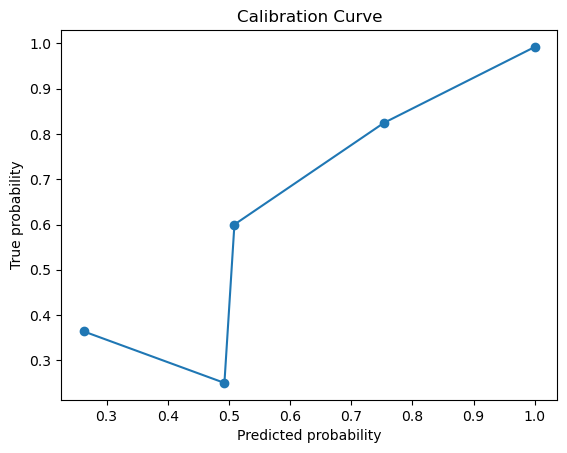

In [59]:
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y_test == y_pred, y_scores.max(axis=1), n_bins=10)
plt.plot(prob_pred, prob_true, marker='o')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration Curve')
plt.show()

In [60]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_test_binarized = label_binarizer.fit_transform(y_test)
n_classes = y_test_binarized.shape[1]

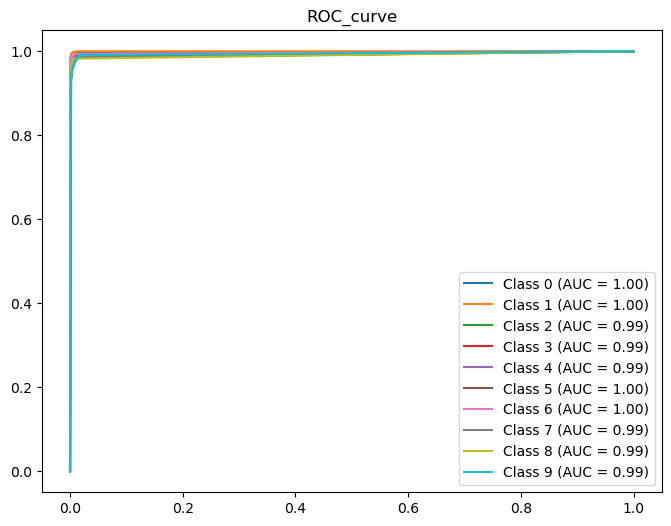

In [64]:
from sklearn.metrics import roc_curve , auc
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
plt.legend()
plt.title('ROC_curve')
plt.show()

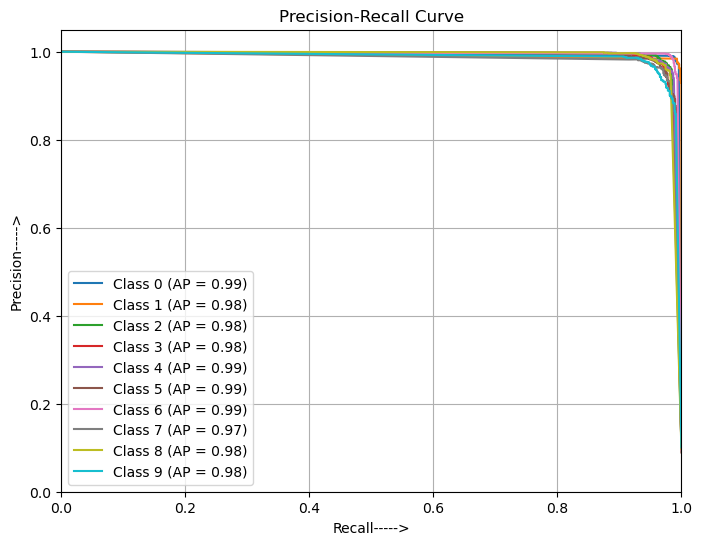

In [66]:
from sklearn.metrics import precision_recall_curve , average_precision_score
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_scores[:, i])
    average_precision = average_precision_score(y_test_binarized[:, i], y_scores[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {average_precision:.2f})')

plt.xlabel('Recall----->')
plt.ylabel('Precision----->')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

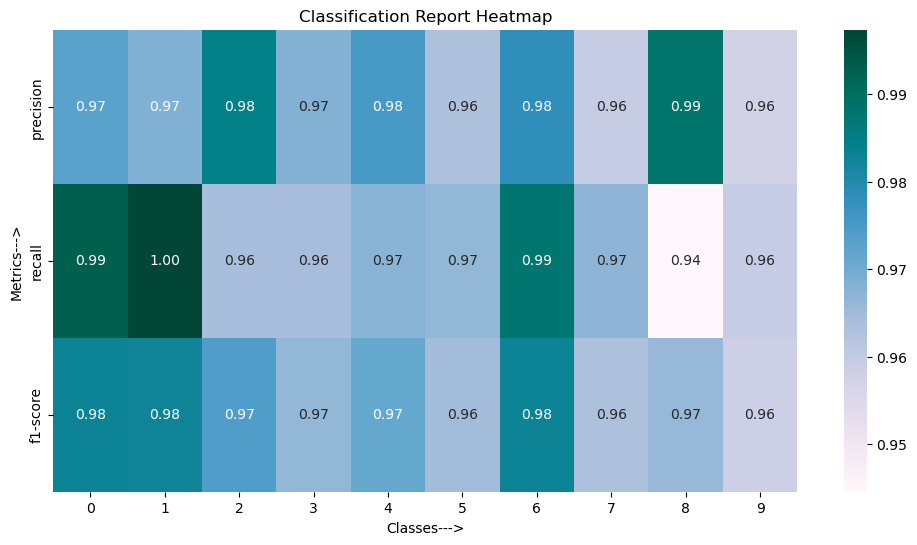

In [67]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred, output_dict=True)
clf_report = pd.DataFrame(clf_report).transpose()
clf_report = clf_report.drop(columns=['support'])
plt.figure(figsize=(12, 6))
sns.heatmap(clf_report.iloc[:-3, :].T, annot=True, cmap='PuBuGn', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.ylabel('Metrics--->')
plt.xlabel('Classes--->')
plt.show()

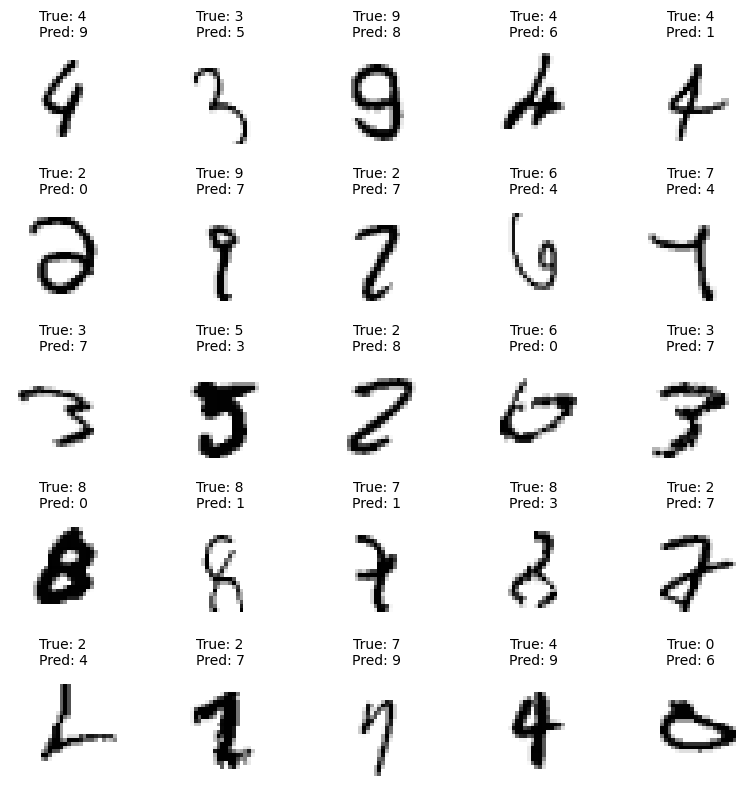

In [70]:
misclassified_idx = np.where(y_test != y_pred)[0]
plt.figure(figsize=(8, 8))
for i, idx in enumerate(misclassified_idx[:25]):  
    plt.subplot(5, 5, i + 1)
    image_data = X_test.iloc[idx].to_numpy().reshape(28, 28)
    plt.imshow(image_data, cmap='binary')
    plt.title(f'True: {y_test.iloc[idx]}\nPred: {y_pred[idx]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [73]:
import joblib
joblib.dump(kn_best_clf, 'knn_mnist_model.pkl')
print("Model saved successfully!")

Model saved successfully!
